# Analysis of Food Prices
By Harshal Patel, Sabrina Almazan, Isis Kazadi, Katie Rink

In [122]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating Datasets
The Dataset for Price Data contains the following information : adm0_id, admo0_name, adm1_id, adm1_name, mkt_id, mkt_name, cm_id, cm_name, cur_id, cur_name, pt_id, pt_name, um_id, um_name, mp_month, mp_year, mp_price.
//Explain what each data value means
The Dataset of Categories contains different types of food under the following categories : Dairy, Meat, Grains, Veggies/Fruits. This allows us to do an analysis based upon our own self decided Categories.
//Include our reasoning for deciding these categories.

In [107]:
#Read in Data
PriceData = pd.read_csv('../Data/global_food_prices.csv', low_memory=False)
Categories = pd.read_csv('../Data/FoodTypes.csv', low_memory=False)

### Clean Data
Explain decisions we made about countries, such as chosen ones and which ones dropped

In [108]:
#Combine months and years into Date column
PriceData["date"] = pd.to_datetime(PriceData.mp_year.astype(str) + '/' + PriceData.mp_month.astype(str) + '/01')
#Only include chosen countries
PriceData = PriceData[PriceData['adm0_name'].isin(['Sudan', 'Mexico', 'China', 'Iraq', 'Ethiopia'])]
#Only include Chosen Years
PriceData = PriceData[PriceData["date"].isin(pd.date_range('2017-01-01','2021-01-01'))]

#Drop unused columns
PriceData = PriceData.drop('mp_year', 1)
PriceData = PriceData.drop('mp_month', 1)
PriceData = PriceData.drop('adm1_id', 1)
PriceData = PriceData.drop('adm1_name', 1)
PriceData = PriceData.drop('mkt_id', 1)
PriceData = PriceData.drop('mkt_name', 1)
PriceData = PriceData.drop('cur_id', 1)
PriceData = PriceData.drop('cur_name', 1)
PriceData = PriceData.drop('pt_id', 1)
PriceData = PriceData.drop('pt_name', 1)
PriceData = PriceData.drop('um_id', 1)
PriceData = PriceData.drop('um_name', 1)
PriceData = PriceData.drop('mp_commoditysource', 1)
#Put all values to lower case
PriceData = PriceData.applymap(lambda s: s.lower() if type(s) == str else s)
Categories = Categories.applymap(lambda s: s.lower() if type(s) == str else s)
#Shorten the names of the cm_name
PriceData['cm_name'] = PriceData['cm_name'].str.split(' -').str.get(0)

### Break Up into Analysis
Explain why we chose to analyze our individual parts

In [114]:
#Datasets based on Food Categories
DairyData = PriceData[PriceData['cm_name'].isin(Categories['Dairy'])] #Dairy Dataset
MeatData = PriceData[PriceData['cm_name'].isin(Categories['Meat'])] #Meat Dataset
GrainsData = PriceData[PriceData['cm_name'].isin(Categories['Grains'])] #Grains Dataset
VegData = PriceData[PriceData['cm_name'].isin(Categories['Fruits/Vegetables'])] #Vegtable/Fruits Dataset

In [110]:
#Datasets based on years
FirstYearsData = PriceData[PriceData["date"].isin(pd.date_range('2013-01-01','2015-01-01'))] #2013-2014 Prices
SecondYearsData = PriceData[PriceData["date"].isin(pd.date_range('2015-01-01','2017-01-01'))] #2015-2016 Prices
ThirdYearsData = PriceData[PriceData["date"].isin(pd.date_range('2017-01-01','2019-01-01'))] #2017-2018 Prices
FourthYearsData = PriceData[PriceData["date"].isin(pd.date_range('2019-01-01','2021-01-01'))] #2019-2020 Prices

In [111]:
#Datasets based on Country
SudanData = PriceData[PriceData['adm0_name'].isin(['sudan'])]
MexicoData = PriceData[PriceData['adm0_name'].isin(['mexico'])]
ChinaData = PriceData[PriceData['adm0_name'].isin(['china'])]
IraqData = PriceData[PriceData['adm0_name'].isin(['iraq'])]
EthiopiaData = PriceData[PriceData['adm0_name'].isin(['ethiopia'])]

### Prices Over Time
Explain the graph and what it shows
Describe Trends Shown

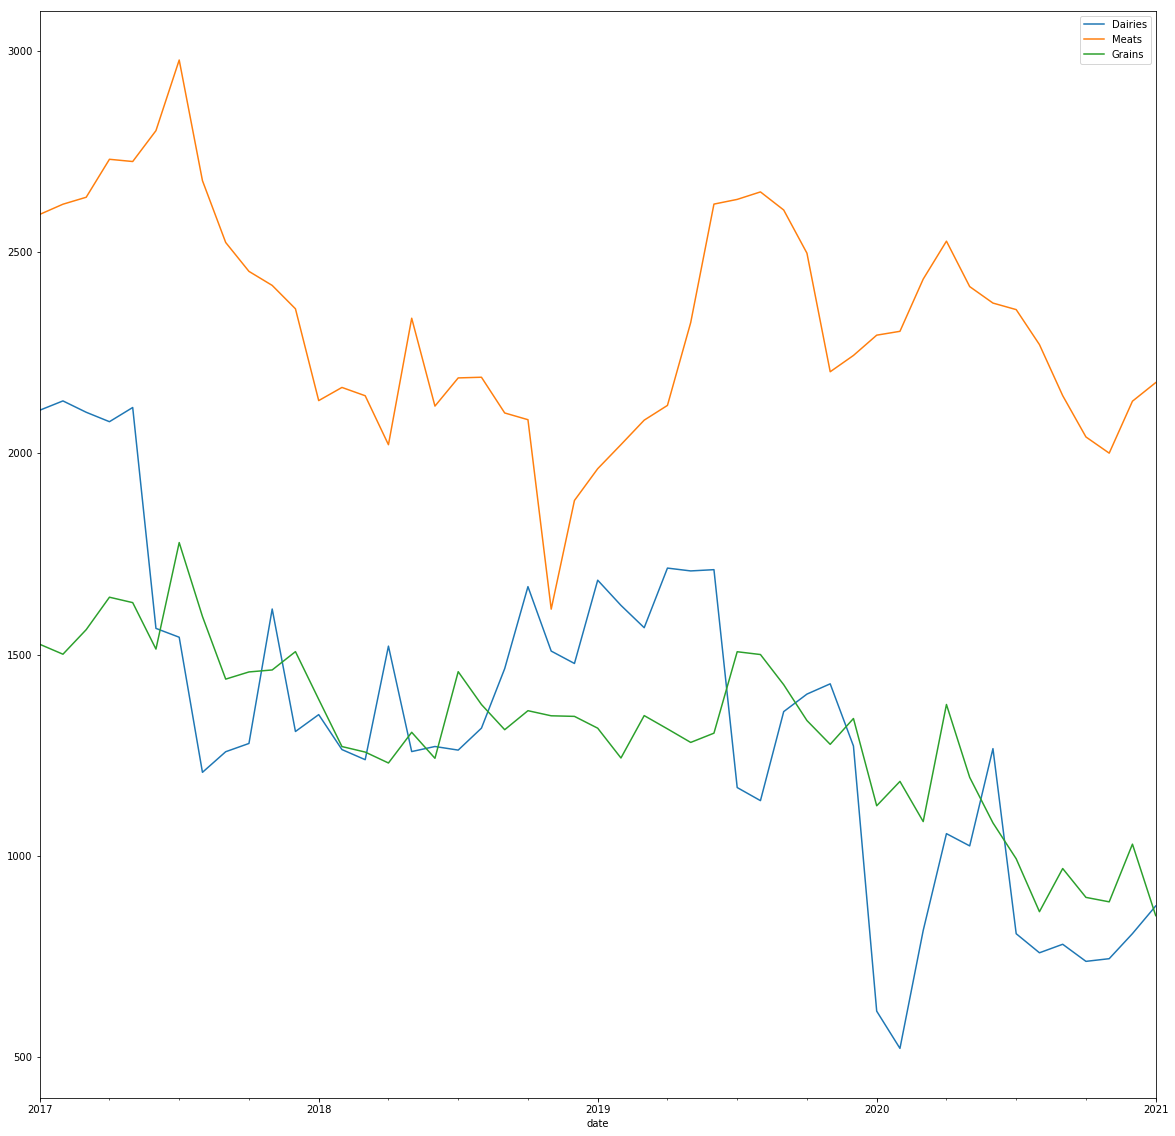

In [116]:
#Find average price of each category at each given date
DairyData =  DairyData.groupby('date', as_index=False)['mp_price'].mean()
MeatData = MeatData.groupby('date', as_index=False)['mp_price'].mean()
GrainsData = GrainsData.groupby('date', as_index=False)['mp_price'].mean()
VegData = VegData.groupby('date', as_index=False)['mp_price'].mean()

#Plot Prices over years based on category
ax = DairyData.plot(x='date', y='mp_price')
ax = MeatData.plot(ax=ax, x='date', y='mp_price')
#ax = GrainsData.plot(ax=ax, x='date', y='mp_price')
VegData.plot(ax=ax, x='date', y='mp_price', figsize=(20,20))
ax.legend(["Dairies", "Meats", "Grains", "Vegetable/Fruits"]);